Part A: Data preparation (Data Cleaning and Data Preprocessing)
Step 1: Import original / source dataset.

In [50]:
import pandas as pd
df = pd.read_csv("../Machine_Learning\Dataset\wet-bulb-temperature-hourly.csv",header='infer')
df

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2
...,...,...,...
351379,2022-01-31,20,24.5
351380,2022-01-31,21,24.5
351381,2022-01-31,22,24.4
351382,2022-01-31,23,24.5


Step 2: Remove unessary data set. Only requires last 5 years / 60 Months dataset.

As the original dataset is using hourly dataset, we will need to calculate how many hourly dataset is required of X months using the formula: 

number of dataset required = months * weeks * days * hours

In [68]:
months = 60
no_of_dataset_required = months * 4 * 7 *24
print('Number of dataset required = %d' % (no_of_dataset_required))
df_trimmed = df.tail(no_of_dataset_required)
df_trimmed

Number of dataset required = 40320


,wbt_date,wbt_time,wet_bulb_temperature
311064,2017-06-27,1,25.6
311065,2017-06-27,2,25.6
311066,2017-06-27,3,25.9
311067,2017-06-27,4,26.0
311068,2017-06-27,5,22.7
...,...,...,...
351379,2022-01-31,20,24.5
351380,2022-01-31,21,24.5
351381,2022-01-31,22,24.4
351382,2022-01-31,23,24.5


Step 3: Check for any duplicate data in original dataset

In [52]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df_trimmed.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 351384
Number of rows after discarding duplicates = 40320


Step 4: 
i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [53]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 40320
Number of attributes = 3
Number of missing values:
	wbt_date: 0
	wbt_time: 0
	wet_bulb_temperature: 0


Step 5: Drop missing data if any exists

In [54]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 40320
Number of rows after discarding missing values = 40320


Step 6: Create visual representation / chart for trimmed dataset.

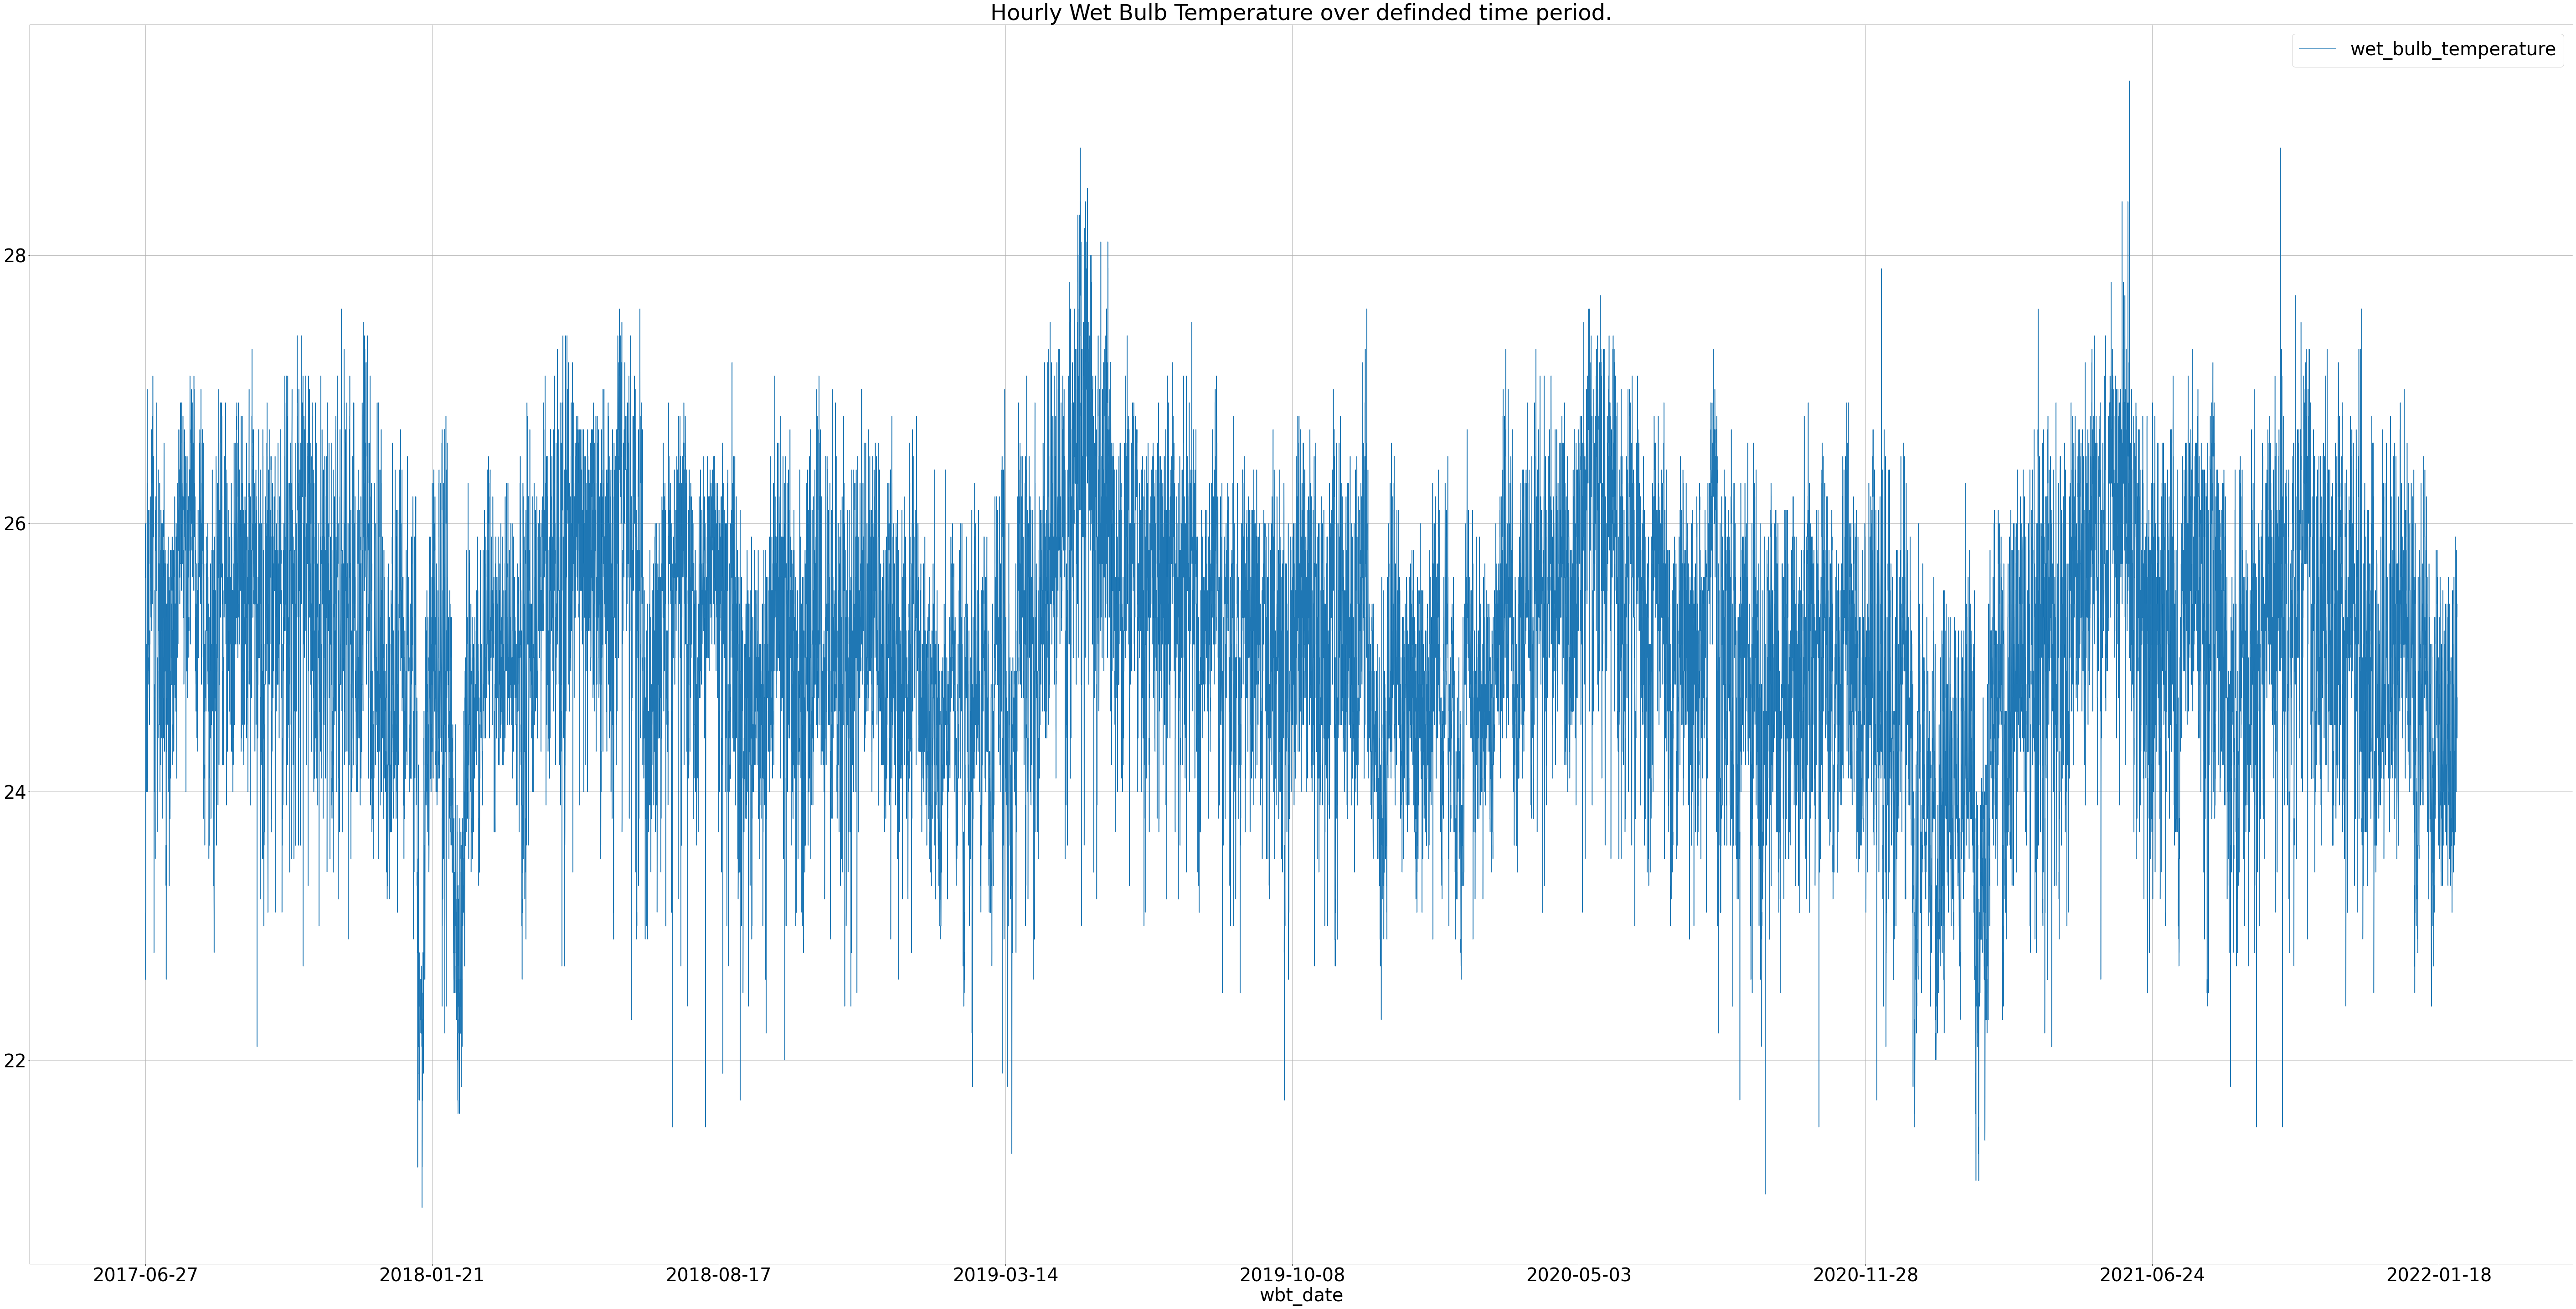

In [67]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})
df_drop_null.plot(x ='wbt_date', y='wet_bulb_temperature', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,50), grid =True)	
plt.show()

Part B: Data Mining

In [93]:
df_clean_data = df_drop_null.copy()
wbt_high_risk = 27.0
wbt_medium_risk = 26.0
wbt_low_risk = 25.0
risk_level = []
for row in df_clean_data.index:
    if(df_clean_data['wet_bulb_temperature'][row]>=wbt_high_risk):
        risk_level.append('high')
    elif((df_clean_data['wet_bulb_temperature'][row]>=wbt_medium_risk) & (df_clean_data['wet_bulb_temperature'][row]<wbt_high_risk)):
        risk_level.append('medium')
    elif((df_clean_data['wet_bulb_temperature'][row]>=wbt_low_risk) & (df_clean_data['wet_bulb_temperature'][row]<wbt_medium_risk)):
        risk_level.append('low')
    else:
        risk_level.append('super_low')
    
df_clean_data['risk_level'] = risk_level
df_clean_data


risk_high = df_clean_data.apply(lambda x: True if x['risk_level'] == 'high' else False , axis=1)
risk_medium = df_clean_data.apply(lambda x: True if x['risk_level'] == 'medium' else False , axis=1)
risk_low = df_clean_data.apply(lambda x: True if x['risk_level'] == 'low' else False , axis=1)
risk_super_low = df_clean_data.apply(lambda x: True if x['risk_level'] == 'super_low' else False , axis=1)


number_of_high = len(risk_high[risk_high==True].index)
number_of_medium = len(risk_medium[risk_medium==True].index)
number_of_low = len(risk_low[risk_low==True].index)
number_of_super_low = len(risk_super_low[risk_super_low==True].index)
total = number_of_high +number_of_medium +number_of_low+number_of_super_low
print('Count of high risk = %d' % number_of_high)
print('Count of medium risk = %d' % number_of_medium)
print('Count of low risk = %d' % number_of_low)
print('Count of super low risk = %d' % number_of_super_low)
print('Total count of all risk = %d' % total)
print('Total count of clean data = %d' % df_clean_data.shape[0])

Count of high risk = 487
Count of medium risk = 6266
Count of low risk = 16701
Count of super low risk = 16866
Total count of all risk = 40320
Total count of clean data = 40320
